# **FASE DE ANÁLISIS DEL PROBLEMA**
- Definición concreta del problema y objetivos.
- Descripción y justificación de las técnicas que se utilizarán
para el trabajo.

# ---------------------- X ----------------------

# **FASE DE PRE-PROCESAMIENTO DE LOS DATOS**
- Análisis exploratorio de los datos (univariante y multivariante)
- Proceso de limpieza de datos.
- Especificación de las vistas minables.

Importamos los paquetes y archivos necesarios para el proyecto.

In [333]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

path = "data/"

#importamos el archivo csv
data = pd.read_csv(path + "clientes.csv", sep=',', encoding='latin-1')

Eliminamos las columnas que creemos irrelevantes para el análisis de los datos, que estorbarían a la hora de crear el modelo de predicción.
Además, definimos el arreglo de columnas a utilizar.

In [334]:
data_filt = data.drop(columns=['IdCliente', 'IdCiudad', 'Nombre', 'Apellido', 'FechaNacimiento', 'Email', 'Direccion', 'Telefono'])

columnas = data_filt.columns

Con el método .head() previsualizamos los primeros datos de nuestro DataFrame

In [335]:
data_filt.head()

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta
0,S,M,10000.0,4,'EducaciÃ³n secundaria (en curso)',Obrero,1,1,13/05/2008,'0-1 Km.',Centro,46,1
1,S,M,70000.0,1,'Estudios universitarios (en curso)','Obrero especializado',0,1,03/11/2007,'0-1 Km.',Sur,55,1
2,C,F,40000.0,1,Licenciatura,'Obrero especializado',1,1,05/11/2006,'0-1 Km.',Centro,39,1
3,C,M,60000.0,3,'Estudios de postgrado',GestiÃ³n,1,2,02/05/2008,'10+ Km.',Norte,74,0
4,S,F,60000.0,0,'Estudios universitarios (en curso)','Obrero especializado',0,2,04/11/2007,'1-2 Km.',Norte,36,0


### **ANALISIS UNIVARIANTE**

#### **_Describe ()_**

Con el método .describe() se muestran estadísticas para todas las columnas del DataFrame, tanto numéricas como no numéricas. Es útil para obtener una visión general completa del DataFrame.

In [336]:
data_filt.describe(include='all').fillna('-').rename(index={'count': 'Cantidad', 'unique': 'Valores únicos',
                                'top': 'Valor más frecuente', 'freq': 'Frecuencia',
                                'mean': 'Media', 'std': 'Desviación estándar',
                                'min': 'Mínimo', '25%': 'Primer cuartil',
                                '50%': 'Mediana', '75%': 'Tercer cuartil',
                                'max': 'Máximo'})

,EstadoCivil,Genero,IngresoAnual,TotalHijos,Educacion,Ocupacion,Propietario,CantAutomoviles,FechaPrimeraCompra,Distancia,Region,Edad,ComproBicicleta
Cantidad,6400,6400,6390.0,6400.0,6400,6400,6400.0,6400.0,6400,6400,6400,6400.0,6400.0
Valores únicos,3,2,-,-,5,5,-,-,1028,5,4,-,-
Valor más frecuente,C,M,-,-,Licenciatura,Profesional,-,-,19/08/2007,'0-1 Km.',Norte,-,-
Frecuencia,3504,3223,-,-,1800,1946,-,-,27,2166,3310,-,-
Media,-,-,57532.081377,1.894844,-,-,0.676562,1.547656,-,-,-,51.195469,0.394375
Desviación estándar,-,-,32331.969091,1.630993,-,-,0.467825,1.14706,-,-,-,11.517698,0.488754
Mínimo,-,-,10000.0,0.0,-,-,0.0,0.0,-,-,-,32.0,0.0
Primer cuartil,-,-,30000.0,0.0,-,-,0.0,1.0,-,-,-,42.0,0.0
Mediana,-,-,60000.0,2.0,-,-,1.0,2.0,-,-,-,49.0,0.0
Tercer cuartil,-,-,70000.0,3.0,-,-,1.0,2.0,-,-,-,59.0,1.0


Analizamos los primeros parámetros importantes y nos parecio importante destacar lo siguiente: 

- Como primer punto importante determinamos que la cantidad de clientes en la lista es de 6400, de los cuales existen 10 de esos clientes que no se tiene información sobre sus ingresos anuales. 

- Otro resultado que nos llamó la atención fue que existe al menos un ingreso anual máximo de $170.000 lo cual es aproximadamente 3 veces el promedio, y cuyo tercer cuartil ronda los $70.000. Debemos tenerlo en cuenta para analizar si se trata de un valor aislado, o si se repite en mas de una ocación, para determinar si se estamos frente a un outlier o no.

- Además, podemos observar que los rangos de las variables varían significativamente, por lo que antes de pasar a la modelización es necesario estandarizar las variables.

#### **_Info ()_**

Utilizamos el metodo de .Info() para conocer cuantas variables nulas hay en nuestro dataframe

In [337]:
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EstadoCivil         6400 non-null   object 
 1   Genero              6400 non-null   object 
 2   IngresoAnual        6390 non-null   float64
 3   TotalHijos          6400 non-null   int64  
 4   Educacion           6400 non-null   object 
 5   Ocupacion           6400 non-null   object 
 6   Propietario         6400 non-null   int64  
 7   CantAutomoviles     6400 non-null   int64  
 8   FechaPrimeraCompra  6400 non-null   object 
 9   Distancia           6400 non-null   object 
 10  Region              6400 non-null   object 
 11  Edad                6400 non-null   int64  
 12  ComproBicicleta     6400 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 650.1+ KB


Confirmamos que existen 10 datos de ingresos anuales que son nulos, por lo tanto debemos tenerlos en cuenta y decidir que hacer con esos valores.

#### **_Varianza y Desvio estandar_**

Calculamos las varianza y el desvío con redondeo a 4 decimales y 
luego, convertimos los resultados a cadenas de texto con formato personalizado y los mostramos por consola.

In [338]:
varianza = data_filt.var(numeric_only=True).round(4)
desvio = data_filt.std(numeric_only=True).round(4)

varianza_str = varianza.apply(lambda x: f"{x:.4f}").to_string()
desvio_str = desvio.apply(lambda x: f"{x:.4f}").to_string()

print("\n----------Varianza----------")
print(varianza_str)
print("\n----------Desvío estándar----------")
print(desvio_str)


----------Varianza----------
IngresoAnual       1045356225.2806
TotalHijos                  2.6601
Propietario                 0.2189
CantAutomoviles             1.3157
Edad                      132.6574
ComproBicicleta             0.2389

----------Desvío estándar----------
IngresoAnual       32331.9691
TotalHijos             1.6310
Propietario            0.4678
CantAutomoviles        1.1471
Edad                  11.5177
ComproBicicleta        0.4888


Analizando los resultados y ayudándonos además con las medidas analizadas anteriormente concluimos que los valores de los ingresos anuales se encuentran muy dispersos, y que su rango es muy amplio. Como vimos en el punto anterior los ingresos anuales varían desde $10.000 hasta $170.000. 

De las demás columnas no encontramos ningún dato significativo para analizar más a fondo. 


#### **_Shape_**

Mostramos la cantidad de filas y columnas del DataFrame.

In [339]:
data_filt.shape

(6400, 13)

#### **_Frecuencia absoluta y relativa_**

Recorremos el arreglo de columnas y calculamos las frecuencias absoluta y relativa de cada variable para mostrarlas por consola 

In [340]:
for col in columnas:
    # Calcular frecuencia y frecuencia relativa de valores en la columna
    frecuencia = data_filt[col].value_counts()
    frecuencia_rel = data_filt[col].value_counts(normalize = True) * 100
    
    # Convertir resultado a cadena de texto con formato personalizado
    frecuencia_rel_str = (frecuencia_rel.round(2).apply(lambda x: str(x) + '%').to_string(float_format='%.2f'))
    
    # Mostrar resultados por consola
    print("\n\n----------" + col + "----------")
    print("Frecuencia:", frecuencia)
    print("\nFrecuencia relativa:", frecuencia_rel_str)



----------EstadoCivil----------
Frecuencia: EstadoCivil
C    3504
S    2894
V       2
Name: count, dtype: int64

Frecuencia relativa: EstadoCivil
C    54.75%
S    45.22%
V     0.03%


----------Genero----------
Frecuencia: Genero
M    3223
F    3177
Name: count, dtype: int64

Frecuencia relativa: Genero
M    50.36%
F    49.64%


----------IngresoAnual----------
Frecuencia: IngresoAnual
60000.0     1088
40000.0      888
70000.0      827
30000.0      797
20000.0      612
80000.0      485
10000.0      409
90000.0      278
50000.0      228
100000.0     200
130000.0     200
110000.0     180
120000.0      98
150000.0      39
170000.0      31
160000.0      30
Name: count, dtype: int64

Frecuencia relativa: IngresoAnual
60000.0     17.03%
40000.0      13.9%
70000.0     12.94%
30000.0     12.47%
20000.0      9.58%
80000.0      7.59%
10000.0       6.4%
90000.0      4.35%
50000.0      3.57%
100000.0     3.13%
130000.0     3.13%
110000.0     2.82%
120000.0     1.53%
150000.0     0.61%
170000.0  

Con respecto al valor máximo del ingreso anual ($170.000)  que nos había llamado la atención, pudimos determinar que existen 31 personas que ganan ese sueldo. Debemos seguir analizando para determinar si se trata o no de un outlier. 


#### **_Histogramas y Boxplots_**

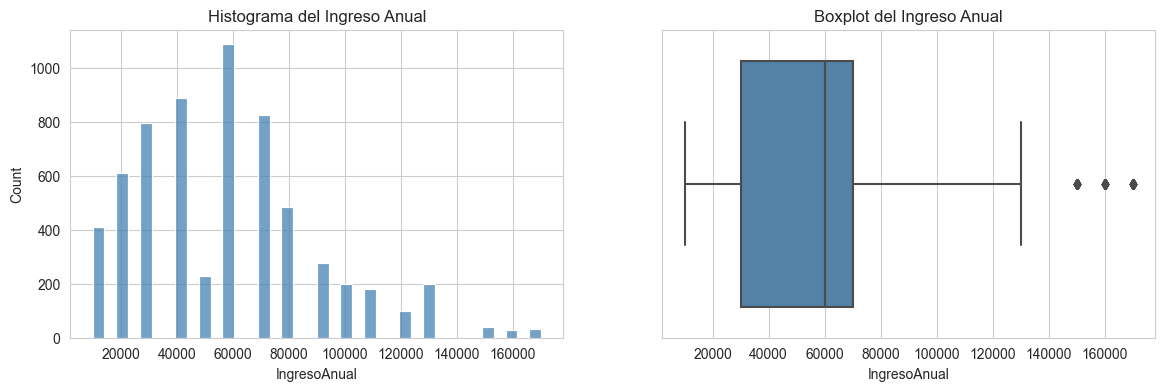

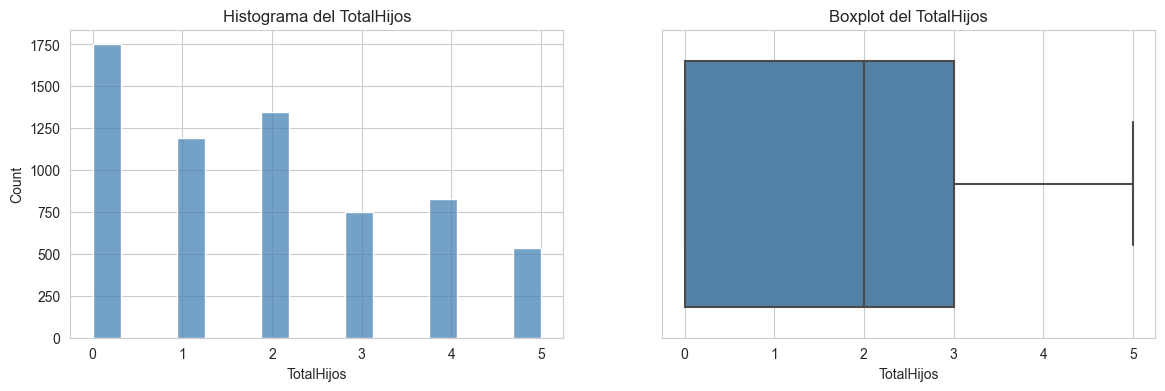

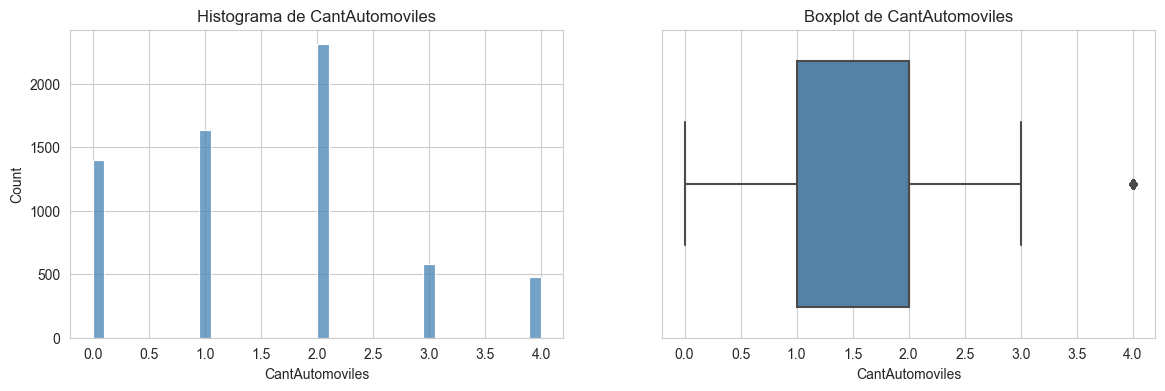

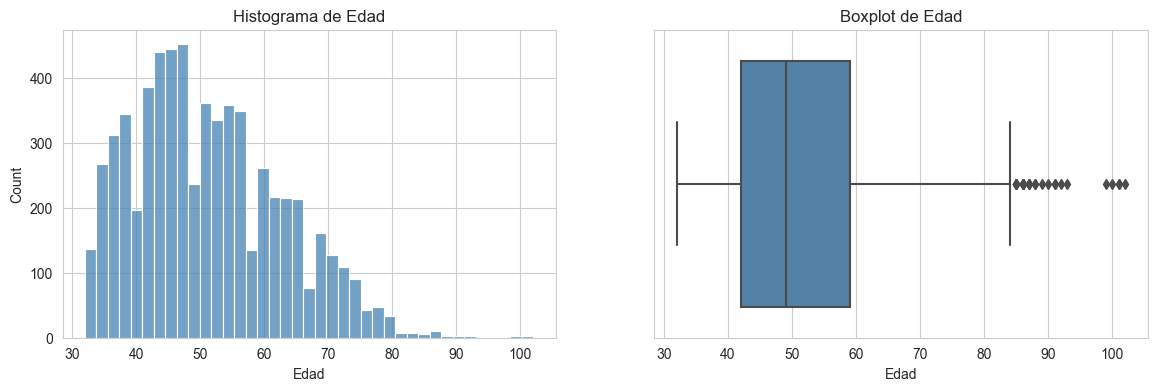

In [341]:
sns.set_style("whitegrid")

# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Crear un histograma de la variable "Ingreso Anual" en el primer subplot
sns.histplot(data=data, x="IngresoAnual", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma del Ingreso Anual")
# Crear un boxplot de la variable "Ingreso Anual" en el segundo subplot
sns.boxplot(data=data, x="IngresoAnual", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot del Ingreso Anual")
# Mostrar la figura completa
plt.show()

# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Crear un histograma de la variable "TotalHijos" en el primer subplot
sns.histplot(data=data, x="TotalHijos", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma del TotalHijos")
# Crear un boxplot de la variable "TotalHijos" en el segundo subplot
sns.boxplot(data=data, x="TotalHijos", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot del TotalHijos")
# Mostrar la figura completa
plt.show()

# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Crear un histograma de la variable "CantAutomoviles" en el primer subplot
sns.histplot(data=data, x="CantAutomoviles", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma de CantAutomoviles")
# Crear un boxplot de la variable "CantAutomoviles" en el segundo subplot
sns.boxplot(data=data, x="CantAutomoviles", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot de CantAutomoviles")
# Mostrar la figura completa
plt.show()

# Crear una figura con dos subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Crear un histograma de la variable "Edad" en el primer subplot
sns.histplot(data=data, x="Edad", ax=ax[0], color="steelblue")
# Agregar un título al primer subplot
ax[0].title.set_text("Histograma de Edad")
# Crear un boxplot de la variable "Edad" en el segundo subplot
sns.boxplot(data=data, x="Edad", ax=ax[1], color="steelblue")
# Agregar un título al segundo subplot
ax[1].title.set_text("Boxplot de Edad")
# Mostrar la figura completa
plt.show()

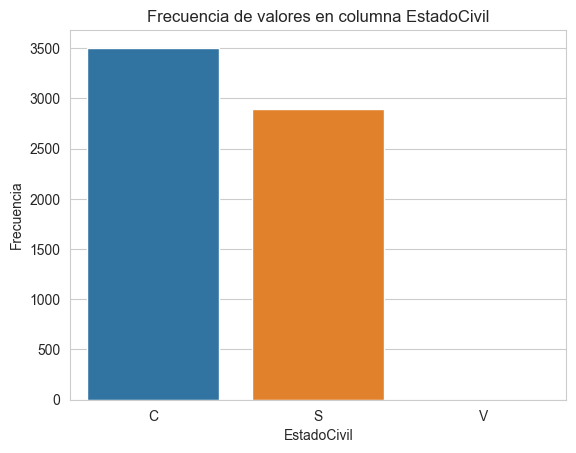

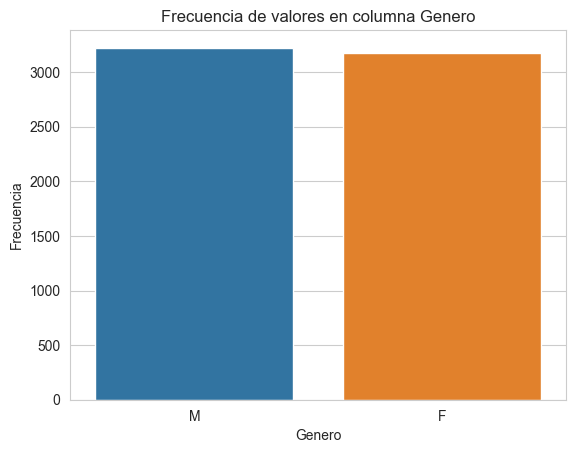

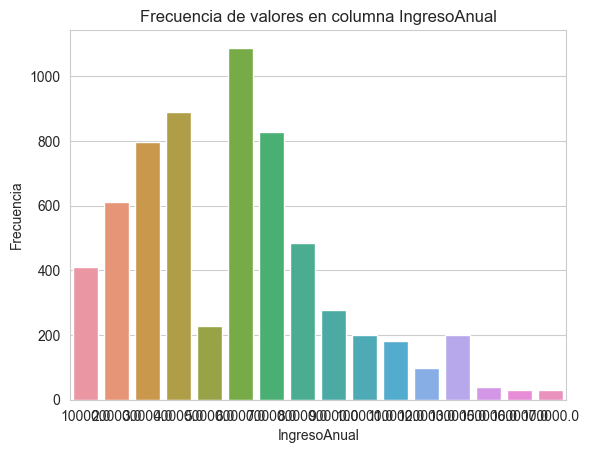

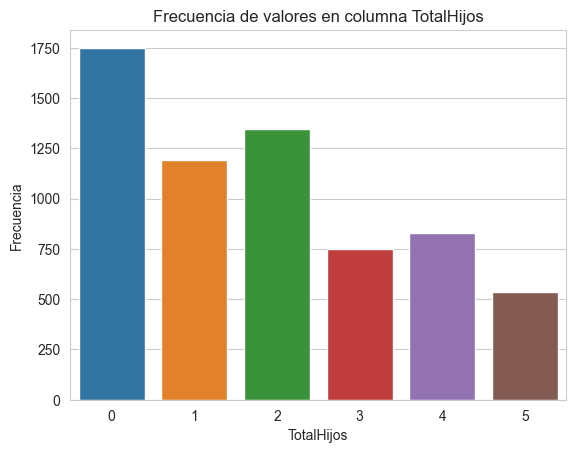

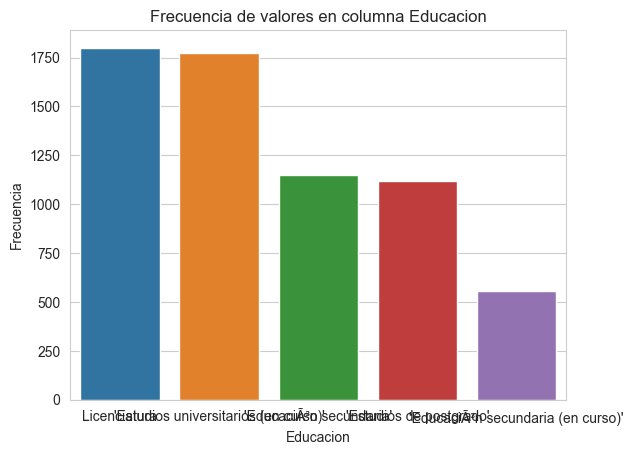

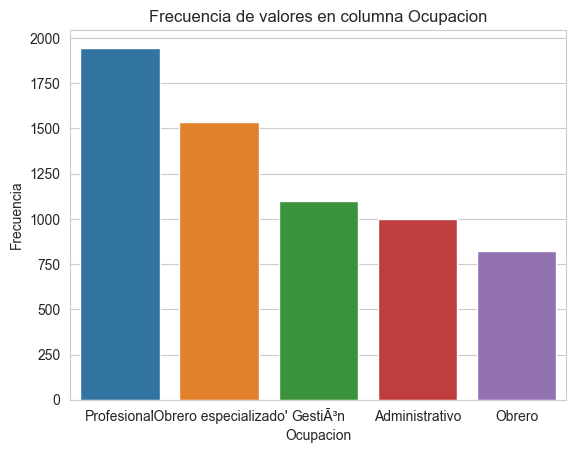

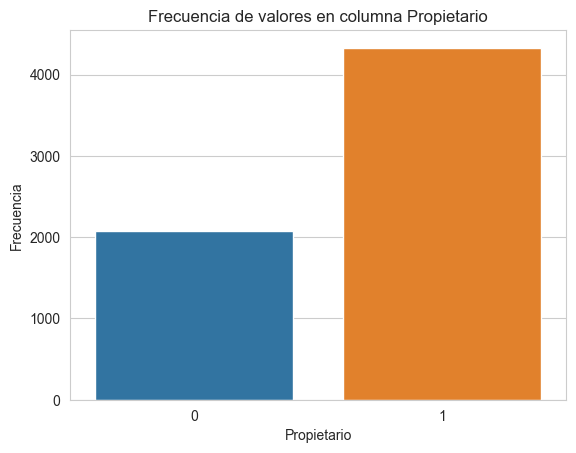

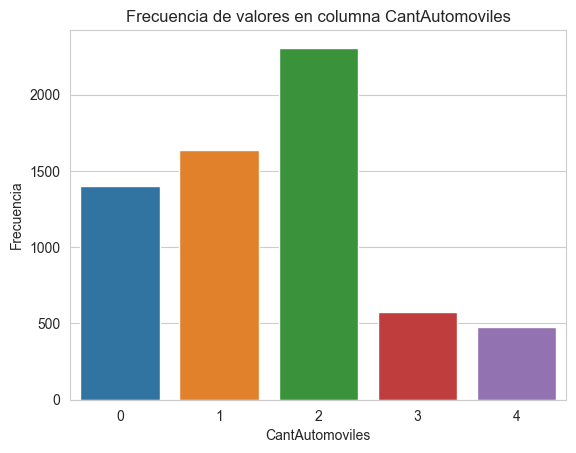

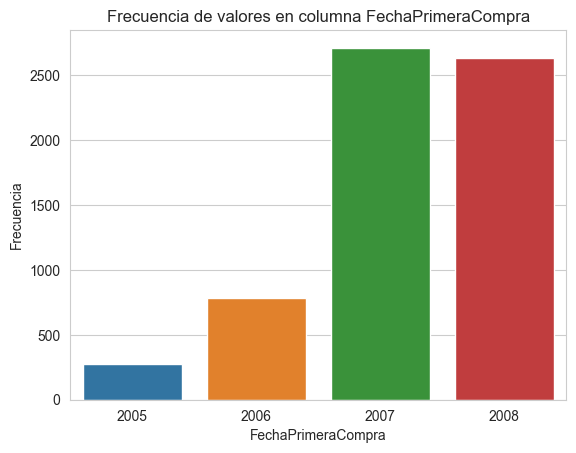

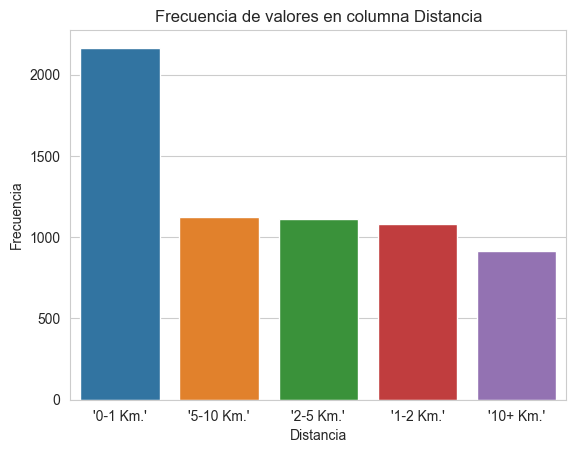

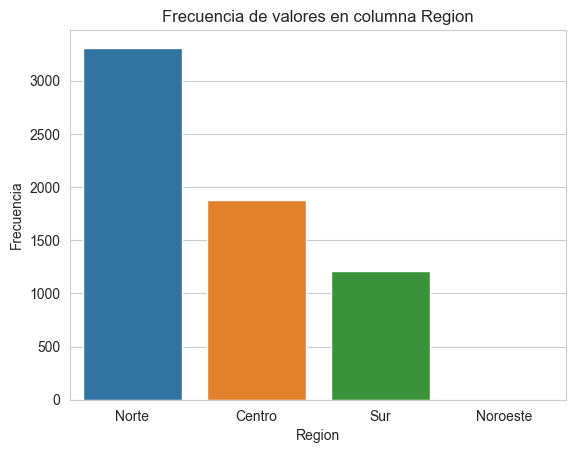

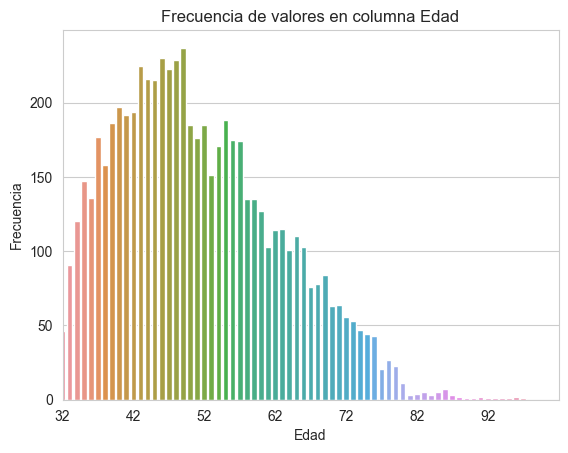

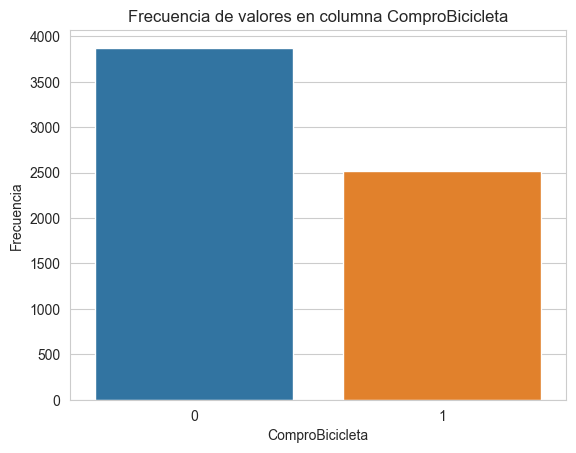

In [342]:
for col in columnas:
    if col == 'FechaPrimeraCompra':
        # Agrupar valores por mes
        data_filt['FechaPrimeraCompra'] = pd.to_datetime(data_filt['FechaPrimeraCompra'], dayfirst=True)
        data_filt['FechaPrimeraCompra'] = data_filt['FechaPrimeraCompra'].dt.to_period('Y')
        frecuencia = data_filt[col].value_counts().sort_index(ascending=True)
    else:
        # Calcular frecuencia y frecuencia relativa de valores en la columna
        frecuencia = data_filt[col].value_counts()

    frecuencia_rel = data_filt[col].value_counts(normalize=True) * 100
    
    # Convertir resultado a cadena de texto con formato personalizado
    frecuencia_rel_str = (frecuencia_rel.round(2).apply(lambda x: str(x) + '%').to_string(float_format='%.2f'))
    
    # Crear gráfico de barras
    plt.figure()
    sns.barplot(x=frecuencia.index, y=frecuencia.values)

    plt.title("Frecuencia de valores en columna " + col)
    plt.xlabel(col)
    if col == 'Edad':
        plt.xticks(np.arange(0, 140, 10))
        plt.xlim(0, 70)
    plt.ylabel("Frecuencia")
    
    # Mostrar el gráfico
    plt.show()

#### Varianza y Desvio estandar

#### Shape